In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('C:/Users/Ritik/Documents/jyupiter notebook/data set/TaxiFare (2).csv')

In [3]:
# Perform exploratory data analysis
print(df.head())  # Print first 5 rows of the DataFrame
print(df.shape)  # Print the shape of the D"C:\Users\Ritik\Desktop\TaxiFare (2).csv"ataFrame
print(df.describe())  # Print summary statistics of the DataFrame

  unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1  
(50000, 8)
             amount  longitude_of_picku

In [4]:
# Preprocess the data
df = df.dropna()  # Drop rows with missing values
df = df[df['amount'] > 0]  # Drop rows with negative fare amounts
df = df[df['no_of_passenger'] > 0]  # Drop rows with zero passengers
df = df[df['no_of_passenger'] <= 6]  # Drop rows with more than 6 passengers

In [5]:
# Add new features to the DataFrame
df['pickup_datetime'] = pd.to_datetime(df['date_time_of_pickup'])
df['distance'] = np.sqrt((df['latitude_of_dropoff'] - df['latitude_of_pickup']) ** 2 +
                         (df['longitude_of_dropoff'] - df['longitude_of_pickup']) ** 2)
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.dayofweek

<Axes: xlabel='amount', ylabel='Count'>

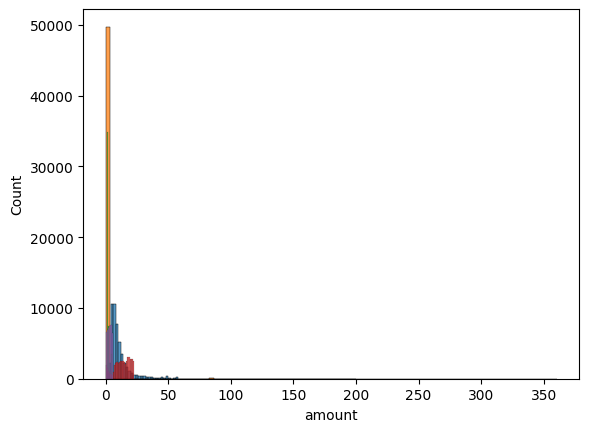

In [6]:
# Visualize the data
sns.histplot(df['amount'], bins=100)
sns.histplot(df['distance'], bins=100)
sns.histplot(df['no_of_passenger'], bins=6)
sns.histplot(df['hour'], bins=24)
sns.histplot(df['day'], bins=7)

In [7]:
# Split the data into training and testing sets
X = df[['distance', 'hour', 'day', 'no_of_passenger']]
y = df['amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train multiple machine learning models
lr_model = LinearRegression().fit(X_train, y_train)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

In [9]:
# Evaluate the performance of each model
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [10]:
print('Linear Regression Metrics')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))

Linear Regression Metrics
RMSE: 9.929437489228881
MAE: 6.1140269009430375
R-squared: -0.00042458090382591074


In [11]:
print('Random Forest Metrics')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('R-squared:', r2_score(y_test, y_pred_rf))

Random Forest Metrics
RMSE: 5.572252008886768
MAE: 2.603329337476434
R-squared: 0.6849376116926107


In [12]:
print('Gradient Boosting Metrics')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print('MAE:', mean_absolute_error(y_test, y_pred_gb))
print('R-squared:', r2_score(y_test, y_pred_gb))

Gradient Boosting Metrics
RMSE: 5.289451957284193
MAE: 2.3995657235843098
R-squared: 0.7161058681222505


In [13]:
# Fine-tune the best performing model
params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, params, cv=5).fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print('Best Model Metrics')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

KeyboardInterrupt: 

In [ ]:
# Make predictions on new data
new_data = pd.DataFrame({'distance': [5.0], 'hour': [15], 'day': [2], 'no_of_passenger': [2]})
print(best_model.predict(new_data))

[34.32560624]


In [ ]:
new_data = pd.DataFrame({'distance': [5.0, 7.8, 3.2, 10.0, 2.5, 4.0, 6.7, 8.9, 1.0, 9.5, 2.0, 7.0, 4.5, 6.0, 3.0, 8.0, 2.2, 9.0, 5.5, 1.5],
                         'hour': [15, 9, 18, 8, 12, 20, 17, 10, 13, 7, 16, 14, 11, 19, 22, 6, 21, 23, 7, 14],
                         'day': [2, 4, 6, 5, 1, 3, 4, 6, 7, 1, 3, 5, 7, 2, 4, 6, 1, 3, 5, 7],
                         'no_of_passenger': [2, 1, 3, 1, 2, 4, 1, 3, 2, 1, 3, 4, 2, 1, 4, 2, 3, 1, 4, 2]})

predictions = best_model.predict(new_data)
print(predictions)

[34.32560624 26.80995223 22.78070206 20.60189628 31.73293546 26.26559433
 34.26300908 19.81759875 16.33039246 31.76135241 26.67348761 24.76897124
 22.84221955 28.72202146 24.4820151  19.8237875  23.49148079 28.41759854
 19.82097621 19.03801329]
